## Grid Quality Notebook

In [1]:
from BZI.symmetry import make_ptvecs, make_rptvecs

In [2]:
import numpy as np

In [3]:
a_fcc = 1.
fcc_lat_vecs = make_ptvecs("fcc", a_fcc)
# These lattice constants were calculated in Mathematica and 
# are such that the volumes are the same.
a_bcc = 0.793701
a_sc = 0.629961

bcc_lat_vecs = make_ptvecs("bcc", a_bcc)
sc_lat_vecs = make_ptvecs("sc", a_sc)

Verify the volumes are the same.

In [4]:
vol_fcc = np.linalg.det(fcc_lat_vecs)
vol_bcc = np.linalg.det(bcc_lat_vecs)
vol_sc = np.linalg.det(sc_lat_vecs)

print("Lattice Vectors","\nfcc:\n", fcc_lat_vecs, "\nbcc:\n", bcc_lat_vecs, "\nsc:\n", sc_lat_vecs)
print("Volumes","\nfcc: ", vol_fcc, "\nbcc: ", vol_bcc, "\nsc: ", vol_sc)

Lattice Vectors 
fcc:
 [[ 0.5  0.5  0. ]
 [ 0.   0.5  0.5]
 [ 0.5  0.   0.5]] 
bcc:
 [[ 0.3968505 -0.3968505  0.3968505]
 [ 0.3968505  0.3968505 -0.3968505]
 [-0.3968505  0.3968505  0.3968505]] 
sc:
 [[ 0.629961  0.        0.      ]
 [ 0.        0.629961  0.      ]
 [ 0.        0.        0.629961]]
Volumes 
fcc:  0.25 
bcc:  0.250000447917 
sc:  0.250000565575


Let's see what the volumes are in reciprocal space.

In [5]:
fcc_rlat_vecs = make_rptvecs("fcc", a_fcc)
bcc_rlat_vecs = make_rptvecs("bcc", a_bcc)
sc_rlat_vecs = make_rptvecs("sc", a_sc)

vol_rfcc = np.linalg.det(fcc_rlat_vecs)
vol_rbcc = np.linalg.det(bcc_rlat_vecs)
vol_rsc = np.linalg.det(sc_rlat_vecs)

print("Reciprical Lattice Vectors","\nfcc:\n", fcc_rlat_vecs, "\nbcc:\n", bcc_rlat_vecs, "\nsc:\n", sc_rlat_vecs)
print("Reciprical Space Volumes","\nfcc: ", vol_rfcc, "\nbcc: ", vol_rbcc, "\nsc: ", vol_rsc)

Reciprical Lattice Vectors 
fcc:
 [[ 6.28318531  6.28318531 -6.28318531]
 [-6.28318531  6.28318531  6.28318531]
 [ 6.28318531 -6.28318531  6.28318531]] 
bcc:
 [[ 7.9163127  0.         7.9163127]
 [ 7.9163127  7.9163127  0.       ]
 [ 0.         7.9163127  7.9163127]] 
sc:
 [[ 9.97392744  0.          0.        ]
 [ 0.          9.97392744  0.        ]
 [ 0.          0.          9.97392744]]
Reciprical Space Volumes 
fcc:  992.20085377 
bcc:  992.199076077 
sc:  992.19860912


Apparently the volume of the supercell is the same for all three.
Next let's check the length of the supercell vectors.

In [6]:
fcc_rmin = np.linalg.norm(fcc_rlat_vecs[:,0])
bcc_rmin = np.linalg.norm(bcc_rlat_vecs[:,0])
sc_rmin = np.linalg.norm(sc_rlat_vecs[:,0])

print("Cutoffs", "\nfcc: ", fcc_rmin, "\nbcc: ", bcc_rmin, "\nsc: ", sc_rmin)

Cutoffs 
fcc:  10.8827961854 
bcc:  11.1953567859 
sc:  9.973927445


Apparently bcc grids are better simply because the length cutoff is longer.

In [7]:
print("bcc/fcc: ", bcc_rmin/fcc_rmin*100 - 100)
print("fcc/sc: ", fcc_rmin/sc_rmin*100 - 100)
print("bcc/sc: ", bcc_rmin/sc_rmin*100 - 100)

bcc/fcc:  2.87206151028
fcc/sc:  9.11244587869
bcc/sc:  12.2462224397


The cutoff length for bcc is about 3% longer than fcc and about 12% longer than sc.

In [8]:
print("(bcc volume)/(fcc volume): ", ((bcc_rmin/fcc_rmin)**3 - 1)*100)

(bcc volume)/(fcc volume):  8.86601573851


The volume enclosed within the sphere defined by the bcc rmin is about 9% larger than fcc.

It's apparent that rmin is larger for bcc grids than fcc grids. I think a better measure of a quality grid would be the number of fourier coefficients contained with the sphere defined by rmin divided by the number exterior to the sphere.

In [9]:
from BZI.sampling import make_grid

In [10]:
help(make_grid)

Help on function make_grid in module BZI.sampling:

make_grid(cell_vectors, grid_type, grid_vectors, offset)
    This function is identical to make_grid except it samples a volume
    that is much larger.



In [11]:
cell_constant = 2.
cell_type = "sc"
cell_vectors = make_ptvecs(cell_type, cell_constant)
offset = [0.,0.,0.]

fcc_grid = make_grid(cell_vectors, "fcc", fcc_lat_vecs, offset)
bcc_grid = make_grid(cell_vectors, "bcc", bcc_lat_vecs, offset)
sc_grid = make_grid(cell_vectors, "sc", sc_lat_vecs, offset)

Let's plot the grids

In [12]:
from BZI.plot import PlotGrid

In [13]:
help(PlotGrid)

Help on function PlotGrid in module BZI.plot:

PlotGrid(grid_points, cell_vecs)
    Create a 3D scatter plot of a set of grid points inside a cell.
    
    Args:
        grid_points (list or np.ndarray): a list of grid points.
        cell_vecs (list or np.ndarray): a list vectors that define a cell.
        
    Returns:
        None



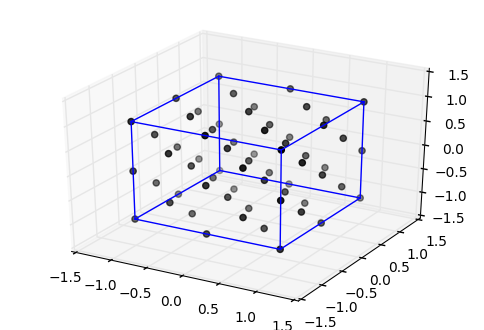

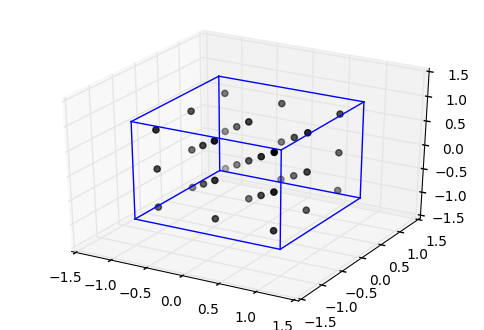

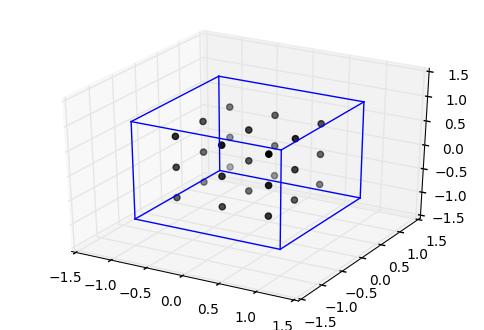

In [14]:
PlotGrid(fcc_grid, cell_vectors)
PlotGrid(bcc_grid, cell_vectors)
PlotGrid(sc_grid, cell_vectors)

Calculate the number of points within the cutoff length divided by the number outside.

In [15]:
print("fcc")
inside = 0.
outside = 0.
for point in fcc_grid:
    if np.linalg.norm(point) <= fcc_rmin:
        inside += 1.
    else:
        outside += 1.
print("outside: ", outside)
print("inside: ", inside)
print("outside/inside: ", outside/inside, "\n")

print("bcc")
inside = 0.
outside = 0.
for point in bcc_grid:
    if np.linalg.norm(point) <= bcc_rmin:
        inside += 1.
    else:
        outside += 1.
print("\noutside: ", outside)
print("inside: ", inside)
print("outside/inside: ", outside/inside, "\n")

print("sc")
inside = 0.
outside = 0.
for point in sc_grid:
    if np.linalg.norm(point) <= sc_rmin:
        inside += 1.
    else:
        outside += 1.
print("\noutside: ", outside)
print("inside: ", inside)
print("outside/inside: ", outside/inside, "\n")

fcc
outside:  0.0
inside:  63.0
outside/inside:  0.0 

bcc

outside:  0.0
inside:  35.0
outside/inside:  0.0 

sc

outside:  0.0
inside:  27.0
outside/inside:  0.0 



Maybe the grid isn't large enough.

In [16]:
cell_constant = 10.
cell_type = "sc"
cell_vectors = make_ptvecs(cell_type, cell_constant)
offset = [0.,0.,0.]

fcc_grid = make_grid(cell_vectors, "fcc", fcc_lat_vecs, offset)
bcc_grid = make_grid(cell_vectors, "bcc", bcc_lat_vecs, offset)
sc_grid = make_grid(cell_vectors, "sc", sc_lat_vecs, offset)

In [17]:
print("fcc")
inside = 0.
outside = 0.
for point in fcc_grid:
    if np.linalg.norm(point) <= fcc_rmin:¨
        inside += 1.
    else:
        outside += 1.
print("outside: ", outside)
print("inside: ", inside)
print("outside/inside: ", outside/inside, "\n")

print("bcc")
inside = 0.
outside = 0.
for point in bcc_grid:
    if np.linalg.norm(point) <= bcc_rmin:
        inside += 1.
    else:
        outside += 1.
print("\noutside: ", outside)
print("inside: ", inside)
print("outside/inside: ", outside/inside, "\n")

print("sc")
inside = 0.
outside = 0.
for point in sc_grid:
    if np.linalg.norm(point) <= sc_rmin:
        inside += 1.
    else:
        outside += 1.
print("\noutside: ", outside)
print("inside: ", inside)
print("outside/inside: ", outside/inside, "\n")

fcc
outside:  0.0
inside:  4631.0
outside/inside:  0.0 

bcc

outside:  0.0
inside:  3925.0
outside/inside:  0.0 

sc

outside:  0.0
inside:  3375.0
outside/inside:  0.0 



Finding HNF form.